## 1. Data Exploration
Let's begin by importing necessary libraries and loading the dataset.

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('customerTargeting.csv')

# Display the first few rows of the dataset
df.head()


,g1_1,g1_2,g1_3,g1_4,g1_5,g1_6,g1_7,g1_8,g1_9,g1_10,...,c_20,c_21,c_22,c_23,c_24,c_25,c_26,c_27,c_28,target
0,4.50,1,3,4,5,1,1,4,6,0,...,-0.383704,-0.065449,0.584000,0.488000,0,-3.232000,-1.944000,-0.007944,1.76,2
1,2.20,24,22,46,10,24,28,18,22,-4,...,-0.346839,-0.159744,-0.947614,0.463540,0,-5.342174,-1.321355,0.181064,1.85,1
2,12.00,7,4,11,18,8,11,2,10,-3,...,-2.673934,-1.592303,0.525305,-0.467169,0,-6.566521,-4.176403,-0.040277,2.05,2
3,1.91,8,5,13,14,6,7,6,9,-1,...,0.616027,0.404945,-1.506923,0.741964,0,-2.438120,-0.787132,-0.012101,1.82,0
4,2.50,23,16,39,14,33,25,18,27,8,...,-1.057214,-1.159294,0.751012,-0.182052,0,-1.259728,0.059574,0.042613,1.99,2


The dataset appears to have multiple columns, likely representing different features or characteristics of the customers. The column named target seems to be a categorical variable, potentially a pre-defined segment or class.  

Here's a breakdown of our next steps:  

1. **Data Pre-processing:** Check for missing values, outliers, and possibly scale the data if needed.  
2. **Exploratory Data Analysis (EDA):** Get some insights on the distribution of the features and the target.  
3. **Customer Segmentation:** Since we have a target column, we can treat this as a supervised problem and build a classification model. However, if we want to discover new segments, we can also apply unsupervised learning techniques like clustering.

## 2. Data Pre-processing
Let's start by checking for missing values in the dataset.

In [2]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

missing_values[missing_values > 0]


Series([], dtype: int64)

Great! There are no missing values in the dataset.  

Next, let's examine the distribution of the target column, as it will help us understand the segmentation in the dataset.

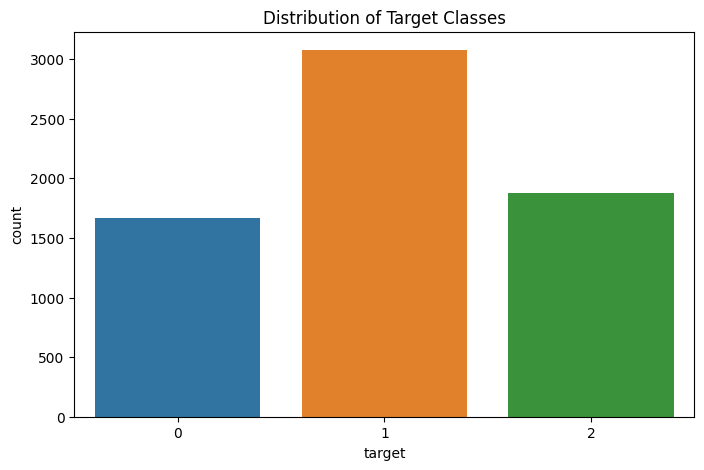

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the target column
plt.figure(figsize=(8, 5))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Classes')
plt.show()


The target column has three distinct classes, with Class 2 being the most prevalent, followed by Class 1 and Class 0.  

Next, we should scale our data since algorithms such as KMeans (if we choose to do clustering) are sensitive to the scale of the data. We'll use the StandardScaler for this.

## 3. Data Scaling
Let's scale the features of the dataset (excluding the target column).

In [4]:
from sklearn.preprocessing import StandardScaler

# Separate the features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


The data has been scaled successfully. Before we proceed with customer segmentation, let's perform some Exploratory Data Analysis (EDA) to gain insights into the relationships and distributions within the dataset.

## 4. Exploratory Data Analysis (EDA)
We'll start by visualizing the distribution of some of the features to understand their characteristics. For simplicity, we'll choose a subset of features for visualization

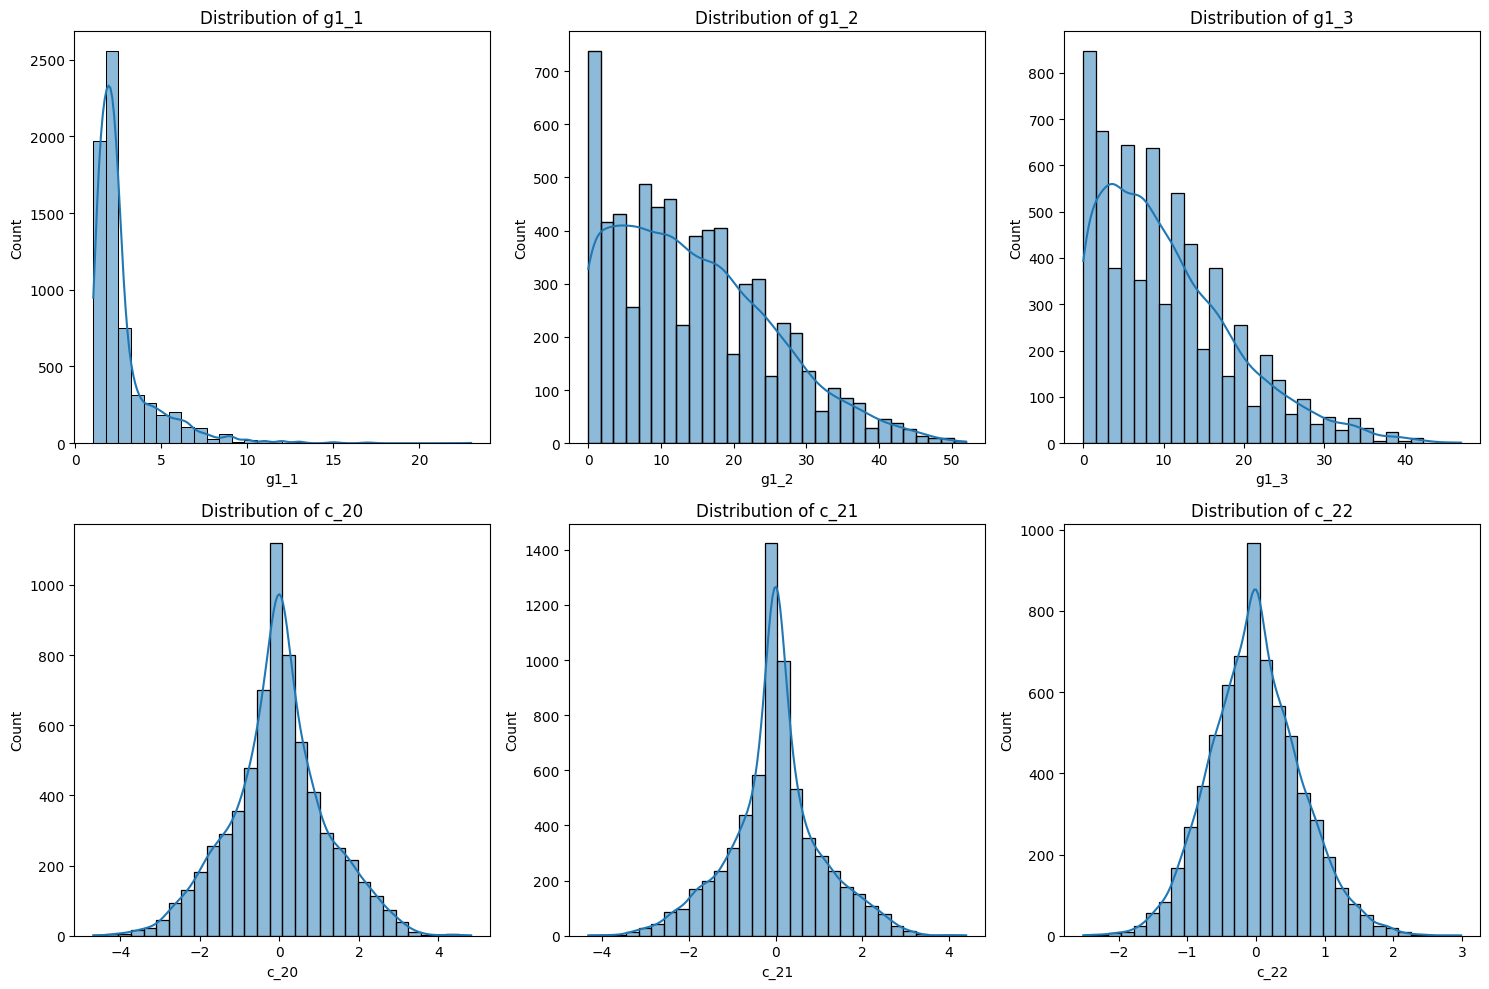

In [5]:
# Choose a subset of features for visualization
subset_features = ['g1_1', 'g1_2', 'g1_3', 'c_20', 'c_21', 'c_22']

# Plot distribution of the subset of features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(subset_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()

plt.show()


The visualizations provide insights into the distributions of a subset of the features:  

- Features like g1_1, g1_2, and g1_3 have distributions that lean more towards the lower values.  
- The columns prefixed with c_ seem to have distributions centered around zero, suggesting they might be some form of standardized or centered metrics.  
  
Next, we'll perform customer segmentation. As mentioned earlier, we have two main approaches:  

1. **Supervised Classification:** Since we have a target column, we can treat this as a supervised problem and build a classification model.  
2. **Unsupervised Clustering:** We can also discover potential new segments by applying unsupervised learning techniques like clustering.  
   
Given the context and the presence of a target column, let's start with the supervised classification approach.

## 5. Supervised Classification 

We'll split the data into training and test sets, train a classifier (Random Forest for its robustness and interpretability), and then evaluate its performance.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier's performance
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

classification_rep, confusion_mat


('              precision    recall  f1-score   support\n\n           0       0.33      0.12      0.17       328\n           1       0.62      0.82      0.71       604\n           2       0.57      0.60      0.58       392\n\n    accuracy                           0.58      1324\n   macro avg       0.51      0.51      0.49      1324\nweighted avg       0.53      0.58      0.54      1324\n',
 array([[ 39, 183, 106],
        [ 39, 494,  71],
        [ 42, 115, 235]]))

The Random Forest Classifier's performance is as follows:  

- **Accuracy:** 58%
- **Precision, Recall, and F1-Score:**  
    - Class 0: Precision = 33%, Recall = 12%, F1-Score = 17%  
    - Class 1: Precision = 62%, Recall = 82%, F1-Score = 71%  
    - Class 2: Precision = 57%, Recall = 60%, F1-Score = 58%  
  
The classifier performs best for Class 1, followed by Class 2. However, it struggles with Class 0, which has the lowest recall and F1-Score. This could be due to various reasons, such as class imbalance or the need for further feature engineering.  

The confusion matrix further confirms these insights.